In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

### Load data: model predictions and true values¶

In [2]:
def calc_metrics(cutoff):

    df = pd.DataFrame(columns=["wt_pdb","mut_pdb","pred_score","true_label"])
    for fold in range(10):
        df = pd.concat([df, pd.read_csv(f"model_predictions/Graphinity_predictions_test-Foldx_ddG_942723-{cutoff}-fold{fold}.csv")])
    assert df.shape[0] == 942723
            
    # pearson correlation
    pc = pearsonr(df["true_label"],df["pred_score"])[0]
    
    # distribution comparison - ratio of st devs
    sdr = df["pred_score"].std()/df["true_label"].std()
    if sdr > 1: sdr = df["true_label"].std()/df["pred_score"].std()

    return pc, sdr

In [3]:
metrics = []

for cutoff in ["random","cutoff_100","cutoff_90","cutoff_70"]:
    pcs, sdr = calc_metrics(cutoff=cutoff)
    metrics.append([cutoff.replace("random","None").replace("cutoff_",""), pcs, sdr])

In [4]:
metrics_df = pd.DataFrame(metrics, columns=["Cutoff","Test Pearson's Correlation", "Standard Deviation Ratio"])

### Plot

##### Figure 4a middle

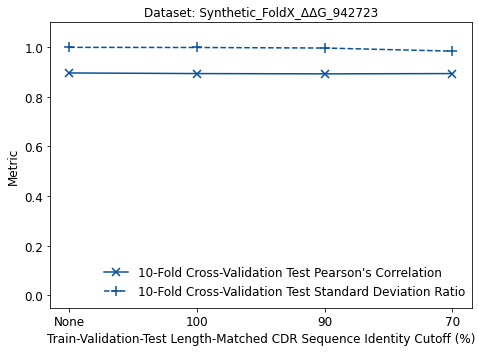

In [5]:
fig,ax = plt.subplots(figsize=(6.75,5))

ax.plot(metrics_df["Cutoff"],metrics_df["Test Pearson's Correlation"],
        marker="x", markersize=8, markeredgewidth=1.5, color="#08519c", linestyle="-",
        label="10-Fold Cross-Validation Test Pearson's Correlation")

ax.set_ylabel("Metric", fontsize=12)
ax.set_xlabel("Train-Validation-Test Length-Matched CDR Sequence Identity Cutoff (%)", fontsize=12)
ax.set_ylim(-0.05,1)

ax.plot(metrics_df["Cutoff"],metrics_df["Standard Deviation Ratio"],
         marker="+", markersize=10, markeredgewidth=1.5, color="#08519c", linestyle="--",
         label="10-Fold Cross-Validation Test Standard Deviation Ratio")

ax.set_ylim(-0.05,1.1)

ax.tick_params(axis="both", which="major", labelsize=12)
ax.tick_params(axis="y", which="major", labelsize=12)

ax.legend(frameon=False, bbox_to_anchor=(1.01,0.185), fontsize=12)

plt.title("Dataset: Synthetic_FoldX_ΔΔG_942723")

plt.tight_layout()

plt.savefig("Figure-4a-middle.png", dpi=300)

#### Figure 4a - left and right

In [6]:
def load_and_plot(left_right):
    
    if left_right == "left": cutoff = "random"
    elif left_right == "right": cutoff = "cutoff_70"

    df = pd.DataFrame(columns=["wt_pdb","mut_pdb","pred_score","true_label"])
    for fold in range(10):
        df = pd.concat([df, pd.read_csv(f"model_predictions/Graphinity_predictions_test-Foldx_ddG_942723-{cutoff}-fold{fold}.csv")])
    assert df.shape[0] == 942723
    
    # plot upper – scatter

    plt.scatter(df["true_label"],df["pred_score"],marker="x",color="k") # label = true, score = pred
    plt.xlabel("True FoldX $\Delta\Delta$G (kcal/mol)")
    plt.ylabel("Predicted $\Delta\Delta$G (kcal/mol)")
    # y=x line
    lims = [
        np.min([plt.xlim(), plt.ylim()]),  # min of both axes
        np.max([plt.xlim(), plt.ylim()]),  # max of both axes
    ]
    plt.plot(lims, lims, "k--", label="$y = x$")
    # trendline
    z = np.polyfit(df["true_label"],df["pred_score"],1)
    p = np.poly1d(z)
    plt.plot(df["true_label"],p(df["true_label"]), linestyle="-", color="#08519c", label="Trendline", linewidth=2)
    # Pearson correlation on plot
    if left_right == "left":
        plt.text(-93, 10,f"r = {pearsonr(df['true_label'],df['pred_score'])[0]:.2f}", ha="center", va="center")
    elif left_right == "right":
        plt.text(-93, 8,f"r = {pearsonr(df['true_label'],df['pred_score'])[0]:.2f}", ha="center", va="center")
    plt.tight_layout()
    plt.legend()
    plt.axis("square")

    ax = plt.gca()
    ax.set_xticks(np.arange(-100,60,20))
    ax.set_yticks(np.arange(-100,60,20))
    
    plt.savefig(f"Figure-4a-upper_{left_right}", dpi=300)
    plt.show()
    plt.clf()

    # plot lower – histogram
    
    sns.histplot(df["true_label"], bins=np.arange(-90,25,0.25), kde=True, alpha=0.25,
                 kde_kws={"bw_adjust":1.5}, color="k", label="True")
    sns.histplot(df["pred_score"], bins=np.arange(-90,25,0.25), kde=True, alpha=0.25,
                 kde_kws={"bw_adjust":1.5}, color="#08519c", label="Predicted")

    if left_right == "left":
        plt.text(x=-7.75, y=175000, s=f"Standard Deviation Ratio = {round(df['pred_score'].std()/df['true_label'].std(), 2)}")
    elif left_right == "right":
        plt.text(x=-7.75, y=160000, s=f"Standard Deviation Ratio = {round(df['pred_score'].std()/df['true_label'].std(), 2)}")

    plt.xlim(-8,5)
    plt.xlabel("FoldX $\Delta\Delta$G (kcal/mol)")
    plt.ylabel("Count")
    plt.legend(frameon=False)

    plt.tight_layout()

    plt.savefig(f"Figure-4a-lower_{left_right}", dpi=300)
    plt.show()

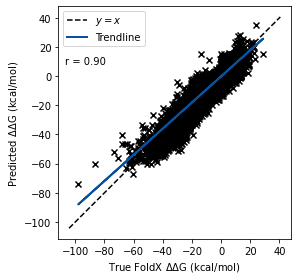

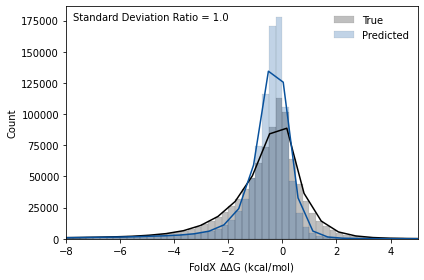

In [7]:
load_and_plot("left")

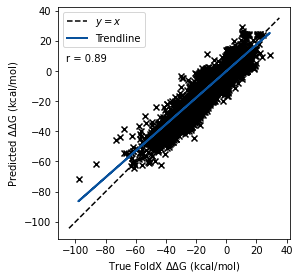

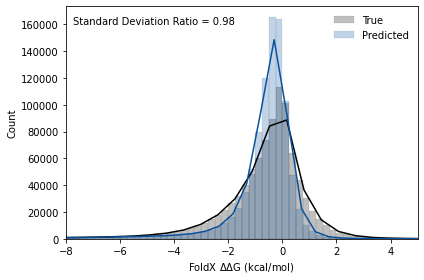

In [8]:
load_and_plot("right")